In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist 
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

2022-01-24 14:10:02.779444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-24 14:10:02.779461: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#loading data and spliting them into train and test

(X_train, y_train), (X_test, y_test) = mnist.load_data()

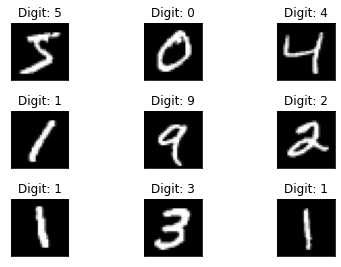

In [3]:
#looking at the data

fig = plt.figure()

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Digit: {y_train[i]}")
    plt.xticks([])
    plt.yticks([])

#### Data normalization and resizing
##### The pixel values of the data ranges from 0 to 255, most of them are close to 0 or 255.

##### By normalizating we will make the values range from 0 to 1 because it helps reduce the speed of training. We can do that by simply dividing each data by 255

##### The neural network takes one dimentional array pixels for the first input but in the data we have 2 dimention, so we need to resize the data before trainning 


In [4]:
#shapes of the data before nomalization
print(f"X_train shape {X_train.shape}")
print(f"X_test  shape {X_test.shape}")

print(f"Y_train shape {y_train.shape}")
print(f"y_test  shape {y_test.shape}")

X_train shape (60000, 28, 28)
X_test  shape (10000, 28, 28)
Y_train shape (60000,)
y_test  shape (10000,)


##### here 60000 and 10000 represents the number of data in each dataset and 28,28 is the pixel resolution of each image 
##### To reshape the data we will need to convert the (28,28) sized pixels into (1,784) sized array (28*28=784)

In [5]:
#reshaping
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)


#normalizing
#casting into float 32 because we are dividing 
X_train= X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train /=255
X_test  /=255

print("Train matrix shape", X_train.shape)
print("Test  matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test  matrix shape (10000, 784)


##### Here the Y still holds still holds integer values from 0 to 9, 
###### Which makes it difficult to calculate the losses for the model
###### So we use one hot encoding to convert each y value to an array of length 10 in which the index of it's value is set to one and others are set to zero

In [14]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [15]:
n_classes = 10
print(f"Shape before one hot encoding: {y_train.shape}")
y_train = np_utils.to_categorical(y_train, n_classes)
y_test  = np_utils.to_categorical(y_test, n_classes)
print(f"Shape after one hot encoding {y_train.shape}")

Shape before one hot encoding: (60000,)
Shape after one hot encoding (60000, 10)


In [16]:
#building the network

model = Sequential()
model.add(Dense(512, input_shape =(784,))) #first layers
model.add(Activation('relu'))
model.add(Dropout(0.2)) #dropout randomly sets input unit by 0 to preventing overfitting, here 20% of input

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))



In [17]:
"""
compiling the model
we specify optimizer and loss function 

loss functions calculate how much the model is incorrect.
optimizer is the function that is responsible for back propagation.
Adam's optimizer involves a combination of two gradient decent methodologies.
"""


"\ncompiling the model\nwe specify optimizer and loss function \n\nloss functions calculate how much the model is incorrect.\noptimizer is the function that is responsible for back propagation.\nAdam's optimizer involves a combination of two gradient decent methodologies.\n"

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [27]:
import os
#training the model and saving metrics in history
history = model.fit(X_train, y_train, batch_size=128, epochs = 20, verbose=2, validation_data=(X_test, y_test))

#saving the model
"""
save_dir = '/results/'
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print(f"Saved the trainned model at {model_path}")
"""



Epoch 1/20
469/469 - 2s - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.1366 - val_accuracy: 0.9853 - 2s/epoch - 4ms/step
Epoch 2/20
469/469 - 2s - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.1495 - val_accuracy: 0.9859 - 2s/epoch - 4ms/step
Epoch 3/20
469/469 - 2s - loss: 0.0108 - accuracy: 0.9977 - val_loss: 0.1479 - val_accuracy: 0.9849 - 2s/epoch - 4ms/step
Epoch 4/20
469/469 - 2s - loss: 0.0075 - accuracy: 0.9983 - val_loss: 0.1506 - val_accuracy: 0.9848 - 2s/epoch - 4ms/step
Epoch 5/20
469/469 - 2s - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.1547 - val_accuracy: 0.9856 - 2s/epoch - 4ms/step
Epoch 6/20
469/469 - 2s - loss: 0.0073 - accuracy: 0.9981 - val_loss: 0.1343 - val_accuracy: 0.9857 - 2s/epoch - 4ms/step
Epoch 7/20
469/469 - 2s - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.1406 - val_accuracy: 0.9848 - 2s/epoch - 4ms/step
Epoch 8/20
469/469 - 2s - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.1567 - val_accuracy: 0.9849 - 2s/epoch - 4ms/step
Epoch 9/20
469/469 - 2s 

'\nsave_dir = \'/results/\'\nmodel_name = \'keras_mnist.h5\'\nmodel_path = os.path.join(save_dir, model_name)\nmodel.save(model_path)\nprint(f"Saved the trainned model at {model_path}")\n'

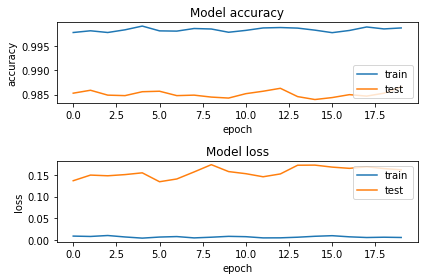

In [28]:
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.tight_layout()

Predicted number 7


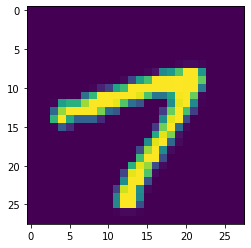

In [53]:
index = 101
pred = np.argmax(model.predict(X_train[index].reshape(1,784)))
print(f"Predicted number {pred}")
plt.imshow(X_train[index].reshape(28,28))

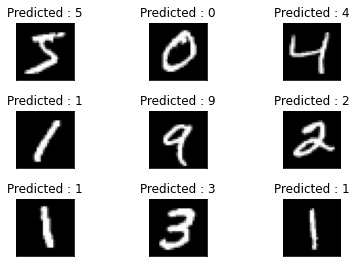

In [55]:
fig = plt.figure()

for i in range(9):
    pred = np.argmax(model.predict(X_train[i].reshape(1,784)))
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.imshow(X_train[i].reshape(28 ,28), cmap="gray")
    plt.title(f"Predicted : {pred}")
    plt.xticks([])
    plt.yticks([])